In [2]:
from scipy.special import digamma, gamma, polygamma
import numpy as np
import matplotlib.pyplot as plt

Convergence of bisection is guaranteed if $\theta^*$ is in [$a_0, b_0$] -> pretty safe as a method. Get this by intermediate value theorem I think. Interval converges $\frac{1}{2^t}$

### **Newton-Raphson**



The apple Newton -> that guy. 

Search for $l'(\theta) = 0$ by linear approximation. Then solve the tangent line for when that hits zero. 

Update step is:

$$
\theta^{[t+1]} = \theta^{[t]} - \frac{l'(\theta^{[t]})}{l''(\theta^{[t]})}
$$

In [3]:
X = (0.44, 0.89, 0.76, 3.99, 3.39, 1.31, 0.98, 3.51, 0.35, 2.06)

def gamma_deriv(X, theta):
    n = len(X)
    return -n * digamma(theta) + sum(np.log(X))

def gamme_deriv_2(X, theta):
    n = len(X)
    return -n * polygamma(1, theta)

In [4]:
def newton_raphson(f, f_prime, theta_0, tol=1e-6, max_iter=100):
    theta = theta_0
    for _ in range(max_iter):
        f_val = f(X, theta)
        f_prime_val = f_prime(X, theta)
        if abs(f_prime_val) < tol:
            break
        theta -= f_val / f_prime_val
    return theta

In [5]:
newton_raphson(gamma_deriv, gamme_deriv_2, theta_0=0.01)

1.7626576264629292

In [6]:
def secant_method(f, theta_0, theta_1, tol = 1e-6, max_iter=100):
    f_theta_0 = f(theta_0)

    for _ in range(max_iter):
        f_theta_1 = f(theta_1)

        f_prime = (f_theta_1 - f_theta_0) / (theta_1 - theta_0)
        theta_1, theta_0 = theta_1 - f_theta_1 / f_prime, theta_1
        if abs(f(theta_1)) < tol:
            return theta_1
        
        f_theta_0 = f_theta_1
    
    print("Did not converge")
    return theta_1






In [8]:
secant_method(lambda x: gamma_deriv(X, x), theta_0=0.01, theta_1=0.02)

1.7626576127812554

In [9]:
x = np.linspace(0, 2 * np.pi, 200)
theta = 2
y = np.exp(-theta * x) + np.random.normal(loc=0, scale=0.01, size=200)

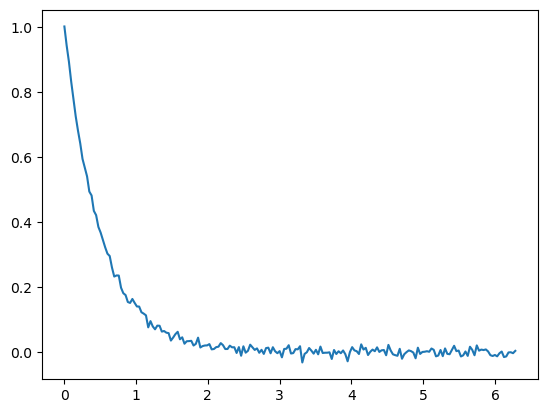

In [11]:
plt.plot(x, y)
plt.show()

In [22]:
def gauss_newton(x_vals, y_vals, theta_0, tol=1e-6, max_iter=100):
    
    for _ in range(max_iter):
        e = (y_vals - np.exp(-theta_0 * x_vals)).reshape(-1, 1)

        X = (-np.exp(-theta_0 * x_vals) * x_vals).reshape(-1, 1)
        theta_0 = theta_0 + np.linalg.inv((X.T @ X)) @ (X.T @ e)
    
    return theta_0


In [24]:
gauss_newton(x_vals=x, y_vals=y, theta_0=0.01)

array([[1.99396357]])

Ok, so now we try this for the likelihood of the previous data.